**Preparación: Descargando el conjunto de datos del Titanic**

El objetivo de este notebook es desarrollar un modelo que prediga quién sobrevivirá en el desastre del Titanic. Para hacer esto, empezaremos descargando el conjunto de datos del Titanic utilizando la API de Kaggle.

1. **Instalación de la API de Kaggle**:

    Primero, necesitamos instalar la biblioteca de la API de Kaggle. Esta biblioteca nos permitirá interactuar con Kaggle y descargar conjuntos de datos directamente en este notebook.

    Instala la biblioteca ejecutando la siguiente celda:
    ```python
    !pip install kaggle
    ```

    Puedes encontrar más detalles sobre cómo utilizar la API de Kaggle en su [documentación oficial](https://www.kaggle.com/docs/api).

2. **Descarga del conjunto de datos**:

    Con la biblioteca instalada, podemos proceder a descargar el conjunto de datos del Titanic. Ejecuta el siguiente comando en una celda:

    ```python
    !kaggle competitions download -c titanic
    ```

    Si deseas explorar más sobre este conjunto de datos, visita la [página de la competencia del Titanic en Kaggle](https://www.kaggle.com/competitions/titanic/data).


In [167]:
!pip install --upgrade gpg -q

Defaulting to user installation because normal site-packages is not writeable
  Using cached gpg-1.10.0.tar.gz (39 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      running bdist_wheel
      running build
      Using gpgme.h from /usr/include/gpgme.h
      running build_ext
      building 'gpg._gpgme' extension
      swigging build/gpgme.i to build/gpgme_wrap.c
      swig -python -threads -py3 -Ibuild -outdir build/lib.linux-x86_64-3.9/gpg -o build/gpgme_wrap.c build/gpgme.i
      error: command 'swig' failed: No such file or directory
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gpg
  Running setup.py clean for gpg
Failed to build gpg
ERROR: Could not build wheels for gpg, which is required to install pyproject.toml-based projects


In [1]:
%%bash
pip3 install kaggle -q  #-q para no mostrar la salidapi

DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
!mkdir -p /home/$USER/.kaggle  #-p ignorar si existe

Descargamos el [kaggle.json](https://www.kaggle.com/settings)

In [3]:
!cp kaggle.json /home/$USER/.kaggle

In [4]:
#Nos recomienda poner permisos de Lectura y Escritura al archivo .json para el propietario por seguridad.
!chmod 600 /home/$USER/.kaggle/kaggle.json

In [5]:
#Nos descargará un .zip
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#creamos una carpeta y descomprimimos dentro los archivos
!mkdir -p titanic
!unzip -o titanic.zip -d ./titanic 

Archive:  titanic.zip
  inflating: ./titanic/gender_submission.csv  
  inflating: ./titanic/test.csv      
  inflating: ./titanic/train.csv     


In [7]:
#Listamos los archivos descomprimidos.
!ls ./titanic

gender_submission.csv  test.csv  train.csv


En esta sección, utilizaremos herramientas como Pandas y NumPy para trabajar con nuestros datos.

In [8]:
!pip3 install -U scikit-learn -q
!pip install pandas -q
!pip install numpy -q
!pip install google-auth-oauthlib -q

DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip

In [9]:
%%bash

pip3 install -U matplotlib -q
pip3 install -U seaborn -q
pip3 install google-cloud-storage -q
pip3 install flask

DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ds = pd.read_csv("./titanic/train.csv")

In [11]:
ds.info()  #Vemos que estamos manejando una cantidad muy pequena de datos, 418 filas y 11 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Fare'>

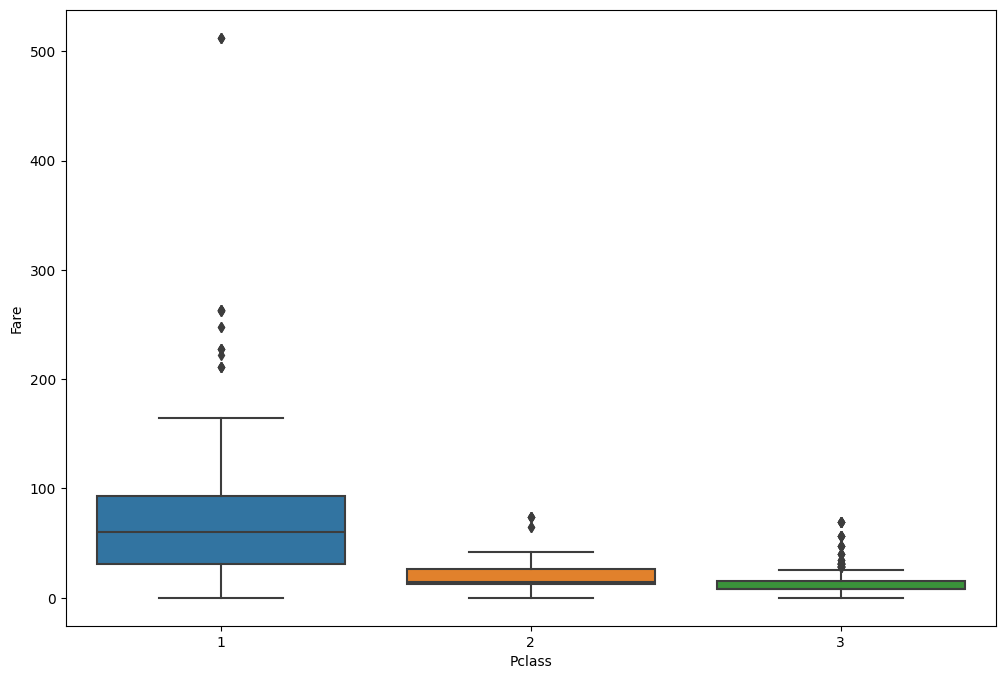

In [14]:
plt.figure(figsize = (12,8))
sns.boxplot(data = ds , x = 'Pclass', y = 'Fare')

Al observar los datos, vemos que tenemos un "PassengerID". Aunque estos datos pueden asignarse sin relación alguna con las variables predictivas, prestaremos atención a su poder predictivo. Sin embargo, partimos de la idea de descartarlo, ya que en su mayoría, los ID no representan ningún valor predictivo, a menos que contengan información implícita, como una correlación del número de ID a la clase. Como no contamos con esa información, asumiremos que no tiene información implícita y, por lo tanto, lo consideraremos como una variable con poco poder de predicción.

La "Pclass" nos indica la clase en la que se viaja, siendo 1 la más alta o de mayor poder adquisitivo, y 3 la más económica.

Tenemos los "Nombres". A primera vista, podemos considerarlos como variables categóricas y pensar en alguna forma de representarlos. Realizar una codificación one-hot (OHE) no es recomendable, pero quizá sí segmentar por género. Sin embargo, como ese dato ya está indicado en otra variable y algunos nombres tienen un título como "Mr.", podría ser útil segmentar los nombres según quién contiene ese título y quién no.

"sibsp": Número de hermanos/cónyuges a bordo del Titanic.

"Parch": Número de padres/hijos a bordo del Titanic.

"Ticket": Número de ticket.

"Fare": Tarifa del pasajero, es decir, lo que pagó por el boleto.

"Cabin": Número de cabina. Puede indicarnos en qué parte del barco se encontraban.

"Embarked": Puerto de embarque. C = Cherburgo, Q = Queenstown, S = Southampton. Representa el lugar donde el pasajero subió al barco. Podríamos pensar en el tiempo en el barco puede ser un factor de predicción.

## Aleatorización de Datos

Antes de comenzar el proceso de entrenamiento, es esencial **aleatorizar** o hacer un *shuffle* de nuestros datos.

### ¿Por qué es crucial aleatorizar los datos?

Cuando los datos están ordenados y no se mezclan adecuadamente, pueden surgir problemas al dividirlos para entrenamiento y validación. Imagina una situación en la que todos los ejemplos de una clase particular terminan en el conjunto de validación mientras que otra clase se concentra en el conjunto de entrenamiento. Esto contradice el principio de que nuestra división debería ser una muestra o división aleatoria.

Más información sobre la importancia de barajear los datos puede ser encontrada en esta [discusión de Data Science Stack Exchange](https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks).

### Evitando la Fuga de Datos

Es fundamental dividir los datos antes de hacer cualquier transformación. Esta precaución nos ayuda a prevenir el **Data Leak**, un problema en el que la información del conjunto de prueba "se filtra" en el proceso de entrenamiento.

Puedes aprender más sobre cómo evitar la fuga de datos en este [artículo de Towards Data Science](https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00).


In [114]:
ds.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [115]:
shuffled_df = ds.sample(frac=1).reset_index(drop=True)

In [116]:
shuffled_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C


Dividiendo los datos en Train, Validation  and Test.
Train es para ajustar los pesos y Validation para ir viendo el desempeno del modelo, sesgo, varianza, asi como para evitar sobreajuste, ajustar hiperparametros.

Test solo se ocupan una vez para la prueba final, simulando el proceso en produccion.

El conjunto test normalmente se ocupa una vez para una verificacion final, si algo sale mal en esto debes encontrar las causa, pero una principal es que el modelo se sobre-ajusto a los datos de entrenamieno y test, por reajustar iteradamente.

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [117]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(shuffled_df, test_size=0.2, random_state=42)

In [118]:
def train_val(df:pd.DataFrame , f:float=0.10)->tuple([pd.DataFrame,pd.DataFrame]):
  test = df.sample(frac = f ,replace = False )
  train =   df[~df.index.isin(test.index)]
  return (train, test)
data_train, data_test = train_val(shuffled_df)

/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


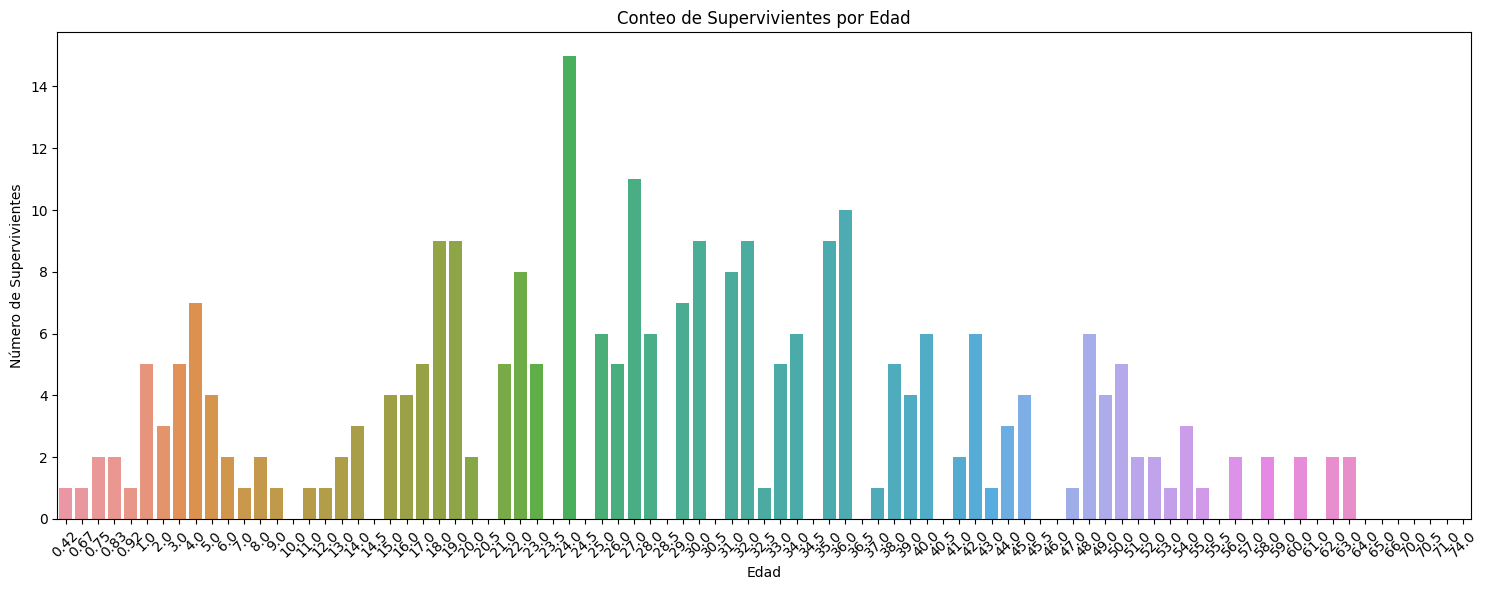

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Agrupamos por Age y sumamos el número de supervivientes para cada edad
age_survived = data_train.groupby('Age')['Survived'].sum().reset_index()

# Usamos un barplot de Seaborn para visualizar
plt.figure(figsize=(15,6))
sns.barplot(x='Age', y='Survived', data=age_survived)
plt.title('Conteo de Supervivientes por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Supervivientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


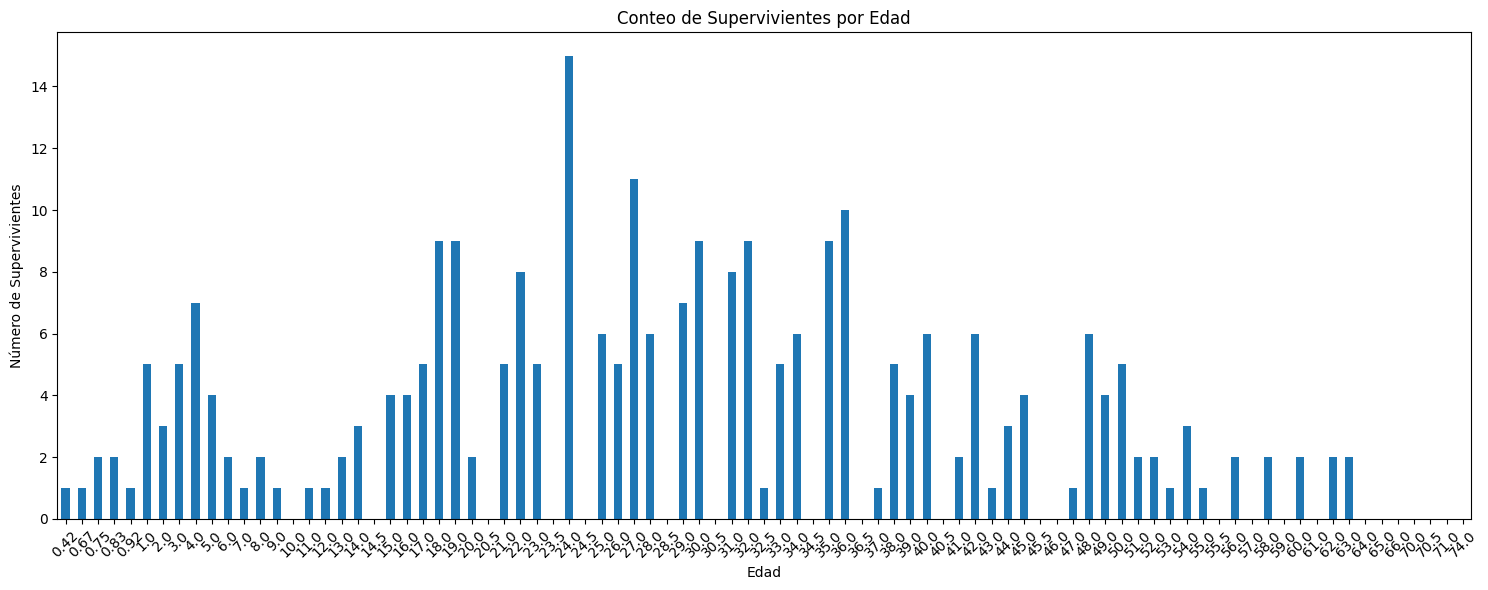

In [120]:
import matplotlib.pyplot as plt

# Agrupamos por Age y sumamos el número de supervivientes para cada edad
age_survived = data_train.groupby('Age')['Survived'].sum()

plt.figure(figsize=(15,6))
age_survived.plot(kind='bar')
plt.title('Conteo de Supervivientes por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Supervivientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -!


/tmp/ipykernel_121709/2281661795.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['AgeQuantile'], bins = pd.qcut(data_train['Age'], num_quantiles, labels=False, retbins=True)
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

/tmp/ipykernel_121709/2281661795.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['AgeQuantile'], bins = pd.qcut(data_train['Age'], num_quantiles, labels=False, retbins=True)
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eyes/Downloads/CV/projectos/GIT_TIT_PROJ/P_02/env2/lib/python3.9/site-packages/s

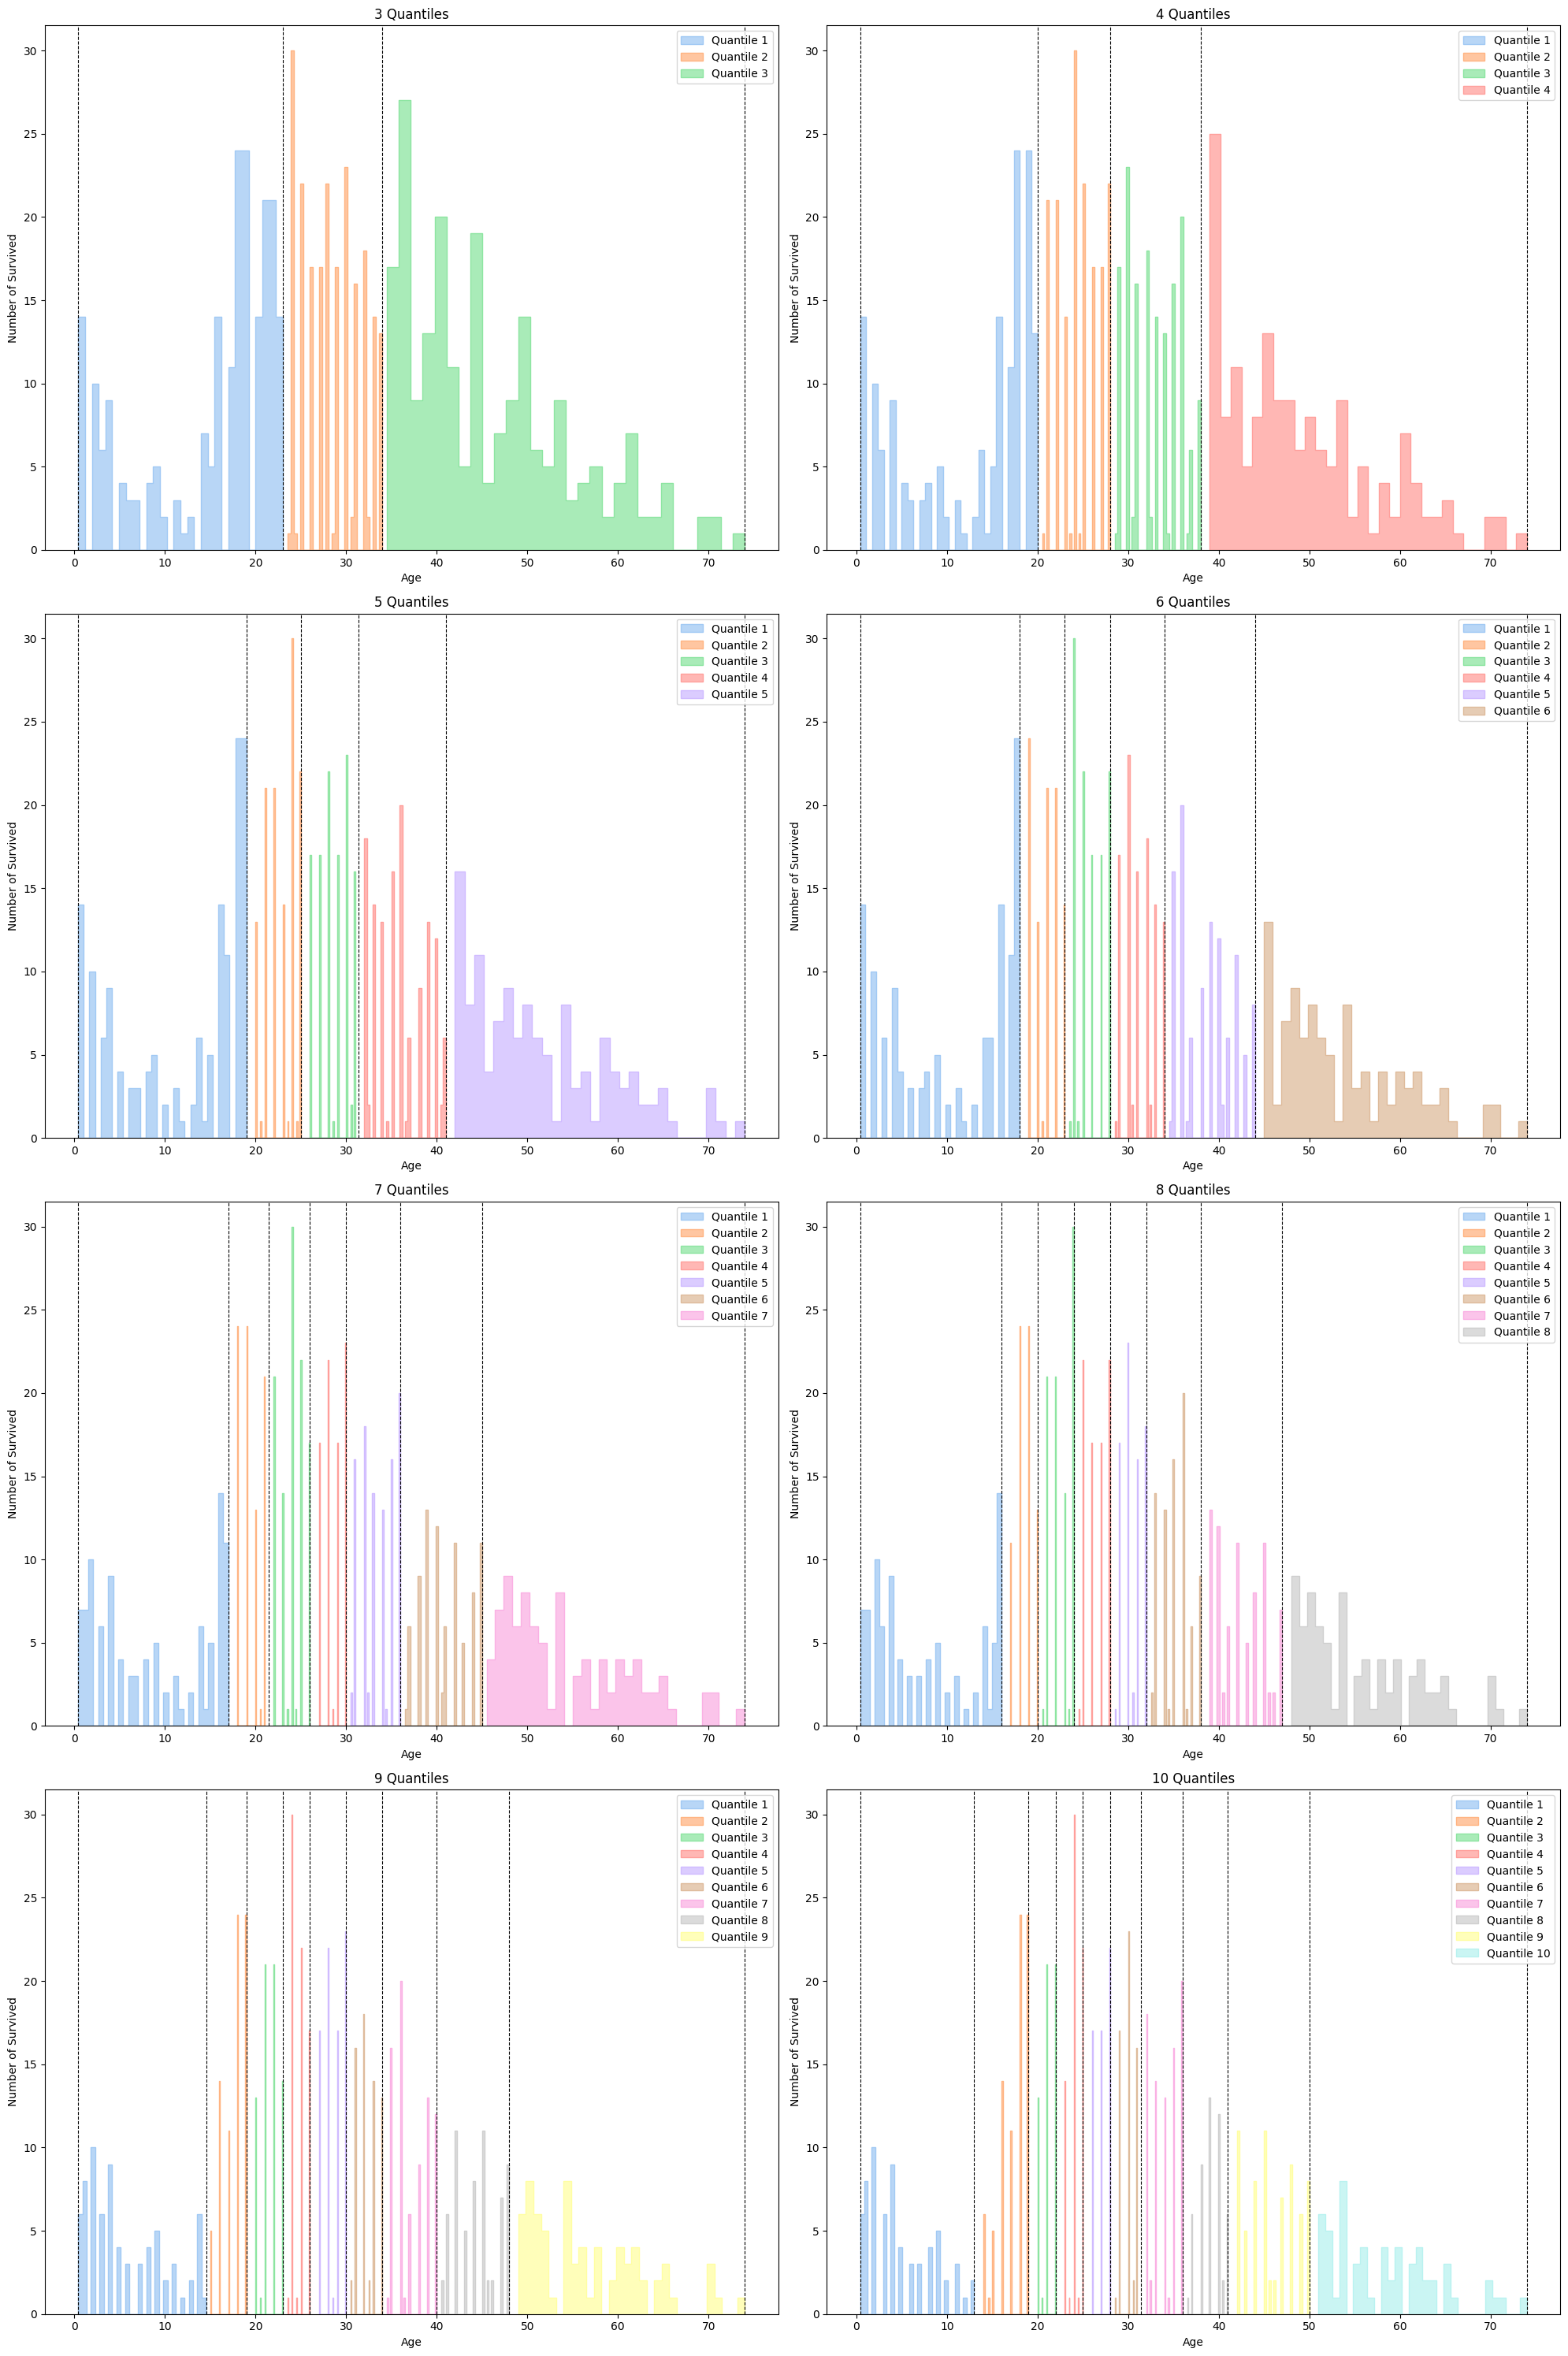

In [121]:
!pip install google-auth-oauthlib -q!pip install google-auth-oauthlib -qimport seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuraciones iniciales
plt.figure(figsize=(20,30))

# Bucle para crear subplots para cada número de cuantiles (desde 3 hasta 10)
for i, num_quantiles in enumerate(range(3, 11)):
    # Crea cuantiles para la variable 'Age'
    data_train['AgeQuantile'], bins = pd.qcut(data_train['Age'], num_quantiles, labels=False, retbins=True)

    # Configura el subplot
    ax = plt.subplot(4, 2, i+1)

    # Dibuja los datos
    for q in range(num_quantiles):
        subset = data_train[data_train['AgeQuantile'] == q]
        sns.histplot(subset['Age'], kde=False, bins=30, color=sns.color_palette("pastel")[q], ax=ax, label=f'Quantile {q+1}', element="step")

    # Dibuja líneas verticales para los bordes de los cuantiles
    for b in bins:
        ax.axvline(b, color='black', linestyle='--', linewidth=0.8)

    ax.set_title(f'{num_quantiles} Quantiles')
    ax.set_xlabel('Age')
    ax.set_ylabel('Number of Survived')
    ax.legend()

plt.tight_layout()
plt.show()


Dado que los modelos usados en tensorflow tienen integrada la opcion de Validacion cruzada, no crearemos esa division de datos hasta ese momento.

Empezaremos con la fase de Limpieza de datos.

Usaremos una metodologia que consiste en revisar columna a columna una lista de limpieza comun a los datos.


* 1  : Repetibilidad en los datos. Existen Datos Repetidos.
* 2  : Inexistencia de datos. Hay datos faltantes, ¿Cómo se tratan?
* 3  : Error en los datos. Hay datos que no sean coherentes con los demás
* 4  : Errores de formato. ‘Espacios en blanco’ error en tipos de datos como char e int, formato de fechas,
* 5  :Verificar formato de fechas
* 6  :Verificar N/a
* 7  :Verificar espacios en blanco
* 8  :Verificar puntos decimal
* 9  :Verificar texto en formato número
* 10 :Verificar misma shape
* 11 :Verificar ortografía
* 12 :Verificar duplicados
* 13 :Verificar rango de datos
* 14 :Verificar números no estén en formato porcentaje o otro
* 15 :Verificar conversiones pesos dólares etc
* 16 :Verificar nombres no sean iguales en duplicados ej: mexico=mex=méxico
* 17 :Verificar en fechas horario de verano, invierno.




Dado que las mismas transformaciones las haremos al conjunto de test, el enfoque sera crear en funciones las transformaciones.

In [122]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import re
from scipy import stats
import numpy as np

In [137]:
def identify_distribution(data):
    size = len(data)
    y, x = np.histogram(data, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Prueba de Normalidad
    shapiro_test_stat, shapiro_p_value = stats.shapiro(data)
    if shapiro_p_value > 0.05:
        return 'normal'

    # Ajustar y probar otras distribuciones
    distributions = ['chi2', 't', 'gamma', 'expon', 'lognorm', 'weibull_min', 'weibull_max']
    for distribution in distributions:
        if distribution == 'chi2':
            params = stats.chi2.fit(data)
        elif distribution == 't':
            params = stats.t.fit(data)
        elif distribution == 'gamma':
            params = stats.gamma.fit(data)
        elif distribution == 'expon':
            params = stats.expon.fit(data)
        elif distribution == 'lognorm':
            params = stats.lognorm.fit(data)
        elif distribution == 'weibull_min':
            params = stats.weibull_min.fit(data)
        elif distribution == 'weibull_max':
            params = stats.weibull_max.fit(data)

        # Test de Kolmogorov-Smirnov
        d, p = stats.kstest(y, distribution, args=params)
        if p > 0.05:
            return distribution

    return 'unknown'

# Ejemplo
distribution = identify_distribution(data_train.loc[~data_train['Age'].isnull(),'Age'])
print(f"The data seems to follow a {distribution} distribution.")


The data seems to follow a unknown distribution.


In [138]:
class DataSetPreparation(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Definimos las categorías para cada columna
        self.name_categories = ['BUCKET_MR', 'BUCKET_MISS', 'BUCKET_MRS', 'BUCKET_NONE']
        self.sex_categories = ['f', 'M', 'O']
        self.embarked_categories = ['s', 'c', 'q', 'o']
        self.cabin_level_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']

        self.std_scaler = StandardScaler()
        self.minmax_scaler = MinMaxScaler()
        self.imputer = SimpleImputer(strategy='mean')
        self.imputer_2 = SimpleImputer(strategy='most_frequent')

        # Columns
        self.BINARY_FEATURES = ['Sex']
        self.NUMERIC_FEATURES = ['Age', 'Fare']
        self.CATEGORICAL_FEATURES = ['Pclass', 'Embarked','Parch', 'SibSp']

    def fit(self, X, y=None):
        X = X.copy()

        # Imputar valores faltantes para columnas excepto 'Age'
        for col in ['Pclass', 'SibSp', 'Parch', 'Fare']:
            X[col] = self.imputer.fit_transform(X[[col]])

        # Calcular media y desviación estándar (no sesgada) de la edad
        self.age_mean = X['Age'].mean()
        self.age_std = X['Age'].std(ddof=1)  # ddof=1 para desviación estándar no sesgada

        # Contar cuántos valores faltantes de edad hay
        missing_age_count = X['Age'].isnull().sum()

        # Generar una muestra aleatoria de edades basada en la media y desviación estándar
        age_sample = np.random.normal(self.age_mean, self.age_std, missing_age_count)

        # Rellenar valores faltantes de edad con la muestra generada
        age_series = X['Age'].copy()
        age_series[np.isnan(age_series)] = age_sample
        X['Age'] = age_series

        X["Embarked"] = self.imputer_2.fit_transform(X[["Embarked"]]).ravel()


        # Ajustar el escalador de estandarización
        self.std_scaler.fit(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
        # Transformar los datos con el escalador de estandarización y ajustar el escalador MinMax
        self.minmax_scaler.fit(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

        self.ticket_frequencies = X['Ticket'].fillna("Unknown").value_counts()
        self.cabin_frequencies = X['Cabin'].value_counts()

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('bin', OrdinalEncoder(), self.BINARY_FEATURES),
                ('num', StandardScaler(), self.NUMERIC_FEATURES),
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.CATEGORICAL_FEATURES)
            ]
        )

        self.preprocessor.fit(X)

        return self

    def transform(self, X, y=None):
        # Borrar duplicados
        X = X.drop_duplicates().copy()
        missing_age_count = X['Age'].isnull().sum()
        age_sample = np.random.normal(self.age_mean, self.age_std, missing_age_count)
        age_series = X['Age'].copy()
        age_series[np.isnan(age_series)] = age_sample
        X['Age'] = age_series
        # Rellenar valores faltantes para las columnas numéricas con las medianas "aprendidas" durante el fit
        for col in ["Pclass", "Age", "SibSp", "Parch", "Fare"]:
            X[col].fillna(-1, inplace=True)
        X["Embarked"] = self.imputer_2.transform(X[["Embarked"]]).ravel() #ravel convierte 2d en 1d

        for col in ["Name", "Sex", "Ticket", "Cabin"]:
            X[col].fillna("Unknown", inplace=True)

##-----------------------VARIABLE CATEGORICAS AUN -------------------------------------------##
        X['NAME_BUCKET'] = X['Name'].apply(self.categorize_name)       #4 VALORES POSIBLES
        X['SEX_BUCKET']  = X['Sex'].apply(self.categorize_sex)         #3 VALORES POSIBLES
        X['EMBARKED']  = X['Embarked'].apply(self.categorize_embarked) #4 VALORES POSIBLES

        # FEATURE SINTETIC
        X['CABINLEVEL'] = X['Cabin'].str[0].fillna("Unknown")          #8 VALORES POSIBLES

###---------------------------------------------VARIABLES FLOAT -------------------------------------------------------------------##
        # Transformar usando estandarización y guardar en nuevas columnas
        X["AGE"] = X["Age"]
###----------------------------towards------------------
        data = [X]
        for dataset in data:
            dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
            dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
            dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
            dataset['not_alone'] = dataset['not_alone'].astype(int)
        deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
        for dataset in data:
            dataset['CABIN'] = dataset['Cabin'].fillna("U0")
            dataset['Deck'] = dataset['CABIN'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
            dataset['Deck'] = dataset['Deck'].map(deck)
            dataset['Deck'] = dataset['Deck'].fillna(0)
            dataset['Deck'] = dataset['Deck'].astype(int)
        X = X.drop(['CABIN'], axis=1)
        for dataset in data:
            mean = self.age_mean
            std = self.age_std
            is_null = dataset["Age"].isnull().sum()
            # compute random numbers between the mean, std and is_null
            rand_age = np.random.randint(mean - std, mean + std, size=is_null)
            # fill NaN values in Age column with random values generated
            age_slice = dataset["Age"].copy()
            age_slice[np.isnan(age_slice)] = rand_age
            dataset["Age"] = age_slice
            dataset["AGE2"] = dataset["Age"].astype(int)
        common_value = 'S'
        for dataset in data:
            dataset['EMBARKED'] = dataset['Embarked'].fillna(common_value)
        for dataset in data:
            dataset['FARE'] = dataset['Fare'].fillna(0)
            dataset['FARE'] = dataset['FARE'].astype(int)
        titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
        for dataset in data:
            # extract titles
            dataset['TITLE'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
            # replace titles with a more common title or as Rare
            dataset['TITLE'] = dataset['TITLE'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
            dataset['TITLE'] = dataset['TITLE'].replace('Mlle', 'Miss')
            dataset['TITLE'] = dataset['TITLE'].replace('Ms', 'Miss')
            dataset['TITLE'] = dataset['TITLE'].replace('Mme', 'Mrs')
            # convert titles into numbers
            dataset['TITLE'] = dataset['TITLE'].map(titles)
            # filling NaN with 0, to get safe
            dataset['TITLE'] = dataset['TITLE'].fillna(0)
        genders = {"male": 0, "female": 1}
        for dataset in data:
            dataset['SEX'] = dataset['Sex'].map(genders)
        ports = {"S": 0, "C": 1, "Q": 2}
        for dataset in data:
            dataset['EMBARKED'] = dataset['EMBARKED'].map(ports)
        for dataset in data:
            dataset['AGE2'] = dataset['AGE2'].astype(int)
            dataset.loc[ dataset['AGE2'] <= 11, 'AGE2'] = 0
            dataset.loc[(dataset['AGE2'] > 11) & (dataset['AGE2'] <= 18), 'AGE2'] = 1
            dataset.loc[(dataset['AGE2'] > 18) & (dataset['AGE2'] <= 22), 'AGE2'] = 2
            dataset.loc[(dataset['AGE2'] > 22) & (dataset['AGE2'] <= 27), 'AGE2'] = 3
            dataset.loc[(dataset['AGE2'] > 27) & (dataset['AGE2'] <= 33), 'AGE2'] = 4
            dataset.loc[(dataset['AGE2'] > 33) & (dataset['AGE2'] <= 40), 'AGE2'] = 5
            dataset.loc[(dataset['AGE2'] > 40) & (dataset['AGE2'] <= 66), 'AGE2'] = 6
            dataset.loc[ dataset['AGE2'] > 66, 'AGE2'] = 6
        for dataset in data:
            dataset.loc[ dataset['FARE'] <= 7.91, 'FARE'] = 0
            dataset.loc[(dataset['FARE'] > 7.91) & (dataset['FARE'] <= 14.454), 'FARE'] = 1
            dataset.loc[(dataset['FARE'] > 14.454) & (dataset['FARE'] <= 31), 'FARE']   = 2
            dataset.loc[(dataset['FARE'] > 31) & (dataset['FARE'] <= 99), 'FARE']   = 3
            dataset.loc[(dataset['FARE'] > 99) & (dataset['FARE'] <= 250), 'FARE']   = 4
            dataset.loc[ dataset['FARE'] > 250, 'FARE'] = 5
            dataset['FARE'] = dataset['FARE'].astype(int)
        for dataset in data:
            dataset['Age_Class']= dataset['AGE2']* dataset['Pclass']
        for dataset in data:
            dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
            dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
        # Crear columnas basadas en diferentes cuantiles 
        data_transformed = self.preprocessor.transform(X)
        df_transformed = pd.DataFrame(data_transformed)
        X = pd.concat([X.reset_index(drop=True), df_transformed.reset_index(drop=True)], axis=1)
        X.loc[:, ['Pclass_std', 'Age_std', 'SibSp_std', 'Parch_std', 'Fare_std']] = self.std_scaler.transform(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
        # Transformar usando MinMaxScaler y guardar en otras nuevas columnas
        X.loc[:, ['Pclass_mm', 'Age_mm', 'SibSp_mm', 'Parch_mm', 'Fare_mm']] = self.minmax_scaler.transform(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
    ##-------------------FEATURE ENGINEER A VARIABLES CATEGORICAS BRUTAS  -> FLOAT/INT---------------------------------------------------------#
        X['TICKET_BUCKET']  = X['Ticket'].apply(self.categorize_ticket)
        X['GROUPSIZE'] = X['Ticket'].map(self.ticket_frequencies).fillna(1)
        # Paso 2: Ajustar la columna "GROUPSIZE" con SibSp y Parch
        X['GROUPSIZE'] = X.apply(lambda row: max(row['GROUPSIZE'], row['SibSp'] + row['Parch'] + 1), axis=1)
        # Paso 3: Crear una columna "IsAlone"
        X['ISALONE'] = (X['GROUPSIZE'] == 1).astype(int)
        # FEATURE SINTETIC
        X['CABINGROUPSIZE'] = X['Cabin'].map(self.cabin_frequencies).fillna(-1)#4 VALORES POSIBLES
##-----------------------FEATURE ENGINEER A VARIABLES CATEGORICAS LIMPIADAS -> FLOAT-------------------------------------------##
        # Aplica la función custom_ohe a cada columna
        name_ohe = self.custom_ohe(X['NAME_BUCKET'], self.name_categories)
        sex_ohe = self.custom_ohe(X['SEX_BUCKET'], self.sex_categories)
        embarked_ohe = self.custom_ohe(X['EMBARKED'], self.embarked_categories)
        cabin_ohe = self.custom_ohe(X['CABINLEVEL'], self.cabin_level_categories)

        # Combina los DataFrames resultantes
        X.columns = X.columns.astype(str)
        ohe_result = pd.concat([name_ohe, sex_ohe, embarked_ohe, cabin_ohe], axis=1)
        X = pd.concat([X, ohe_result], axis=1)
        return X

    @staticmethod
    def categorize_name(name):
        name_lower = name.lower()
        if 'mr' in name_lower:
            return 'BUCKET_MR'
        elif 'miss' in name_lower or 'mlle' in name_lower or 'ms' in name_lower:
            return 'BUCKET_MISS'
        elif 'mrs' in name_lower or 'Mme' in name_lower:
            return 'BUCKET_MRS'
        else:
            return 'BUCKET_NONE'
    @staticmethod
    def categorize_sex(sex):
        sex_lower = sex.lower()
        if 'female' in sex_lower:
            return 'f'
        elif 'male' in sex_lower:
            return 'M'
        else:
            return 'O'
    def categorize_ticket(self, ticket):
        freq = self.ticket_frequencies.get(ticket, 0)
        return freq if 1 <= freq <= 7 else 0
    # Función para asignar cuantiles
    @staticmethod
    def assign_quantile(df, column, n_quantiles):
        labels = list(range(1, n_quantiles + 1))
        return pd.qcut(df[column], q=n_quantiles, labels=labels, retbins=True, duplicates='drop') 
    @staticmethod
    def categorize_embarked(em):
        em_lower = em.lower()
        if 's' in em_lower:
            return 's'
        elif 'c' in em_lower:
            return 'c'
        elif 'q' in em_lower:
            return 'q'
        else:
            return 'o'
    def custom_ohe(self, column, categories):
        """Aplica One-Hot Encoding a la columna dadas las categorías especificadas."""
        # Crea un DataFrame con OHE
        ohe_df = pd.get_dummies(column, prefix_sep='_')

        # Crea un DataFrame vacío con las categorías deseadas
        custom_ohe_df = pd.DataFrame(0, index=ohe_df.index, columns=categories)

        # Llena el DataFrame personalizado con las columnas del OHE original
        for col in categories:
            if col in ohe_df.columns:
                custom_ohe_df[col] = ohe_df[col].values

        return custom_ohe_df
    def preprocess_data(self, df: pd.DataFrame) -> pd.DataFrame:
        # 1. Clean missing numerics
        for n in self.NUMERIC_FEATURES:
            df[n] = pd.to_numeric(df[n], errors='coerce')
        df = df.fillna(df.mean())

        # 2. Transformation Pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('bin', OrdinalEncoder(), self.BINARY_FEATURES),
                ('num', StandardScaler(), self.NUMERIC_FEATURES),
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.CATEGORICAL_FEATURES)
            ]
        )

        data_transformed = preprocessor.fit_transform(df)

        # Convert transformed data back to DataFrame for readability (optional)
        columns_transformed = (self.BINARY_FEATURES +
                              self.NUMERIC_FEATURES +
                              list(preprocessor.named_transformers_['cat'].get_feature_names_out(self.CATEGORICAL_FEATURES)))

        df_transformed = pd.DataFrame(data_transformed, columns=columns_transformed)
        return df_transformed

In [148]:
class feature_engineer(BaseEstimator, TransformerMixin):
    def fit(self, data_, y=None):
        # Obtener el índice de la columna "AGE"
        idx_age = data_.columns.get_loc("AGE")
        # Seleccionar todas las columnas desde "AGE" en adelante
        data = data_.iloc[:, idx_age:]
        data_without_missing_age = data[data['AGE'] != -1]
        data_for_clustering = data_without_missing_age.drop(columns=['Age_std', 'Age_mm'])

        data_for_clustering_all = data.drop(columns=['AGE','Age_std', 'Age_mm']) #Agregue esta linea con todos los datos para calcular al final
        data_for_clustering_all_2 = data.drop(columns=['Age_std', 'Age_mm']) #Agregue esta linea con todos los datos para calcular al final

        self.c1 = data_for_clustering_all.columns
        self.c2 = data_for_clustering_all_2.columns

        intervals = [(i, i+5) for i in range(0, 85, 5)]
        selected_centroids = []
        # 2. Seleccionar un dato aleatorio dentro de cada intervalo
        np.random.seed(42)
        for start, end in intervals:
            subset = data_without_missing_age[(data_without_missing_age['AGE'] >= start) & (data_without_missing_age['AGE'] < end)]
            if not subset.empty:
                sample = subset.sample(1).iloc[:,1:]
                selected_centroids.append(sample)
        # # 3. Concatenar todos los datos seleccionados
        initial_centroids_df = pd.concat(selected_centroids)
        # # Definiendo las características para clustering
        # Obtener todas las columnas de 'data'
        features_for_clustering = data.columns.tolist()
        # Excluir las columnas 'AGE', 'Age_std' y 'Age_mm'
        features_for_clustering = [column for column in features_for_clustering if column not in ['AGE', 'Age_std', 'Age_mm']]
        initial_centroids_values = initial_centroids_df[features_for_clustering].values
        # # Aplicar KMeans
        self.kmeans  = KMeans(n_clusters=len(initial_centroids_values), init=initial_centroids_values, n_init=1, random_state=42).fit(data_for_clustering.iloc[:,1:])
        self.kmeans_2 = KMeans(n_clusters=20, n_init=10, random_state=42).fit(data_for_clustering)
        self.kmeans_models = [KMeans(n_clusters=int(i+2), n_init=10, random_state=i).fit(data) for i in range(15)]

        return self

    def transform(self, data_):
        # Aquí pondrás todas las transformaciones adicionales que necesitas.
        idx_age = data_.columns.get_loc("AGE")
        # Seleccionar todas las columnas desde "AGE" en adelante
        data_a = data_.iloc[:, idx_age:]

        # Predecir los clusters
        cluster_assignments = self.kmeans.predict(data_[self.c1])
        cluster_assignments_2 = self.kmeans_2.predict(data_[self.c2])
        # Agregar las asignaciones de clusters como nuevas columnas
        data_['Cluster_1'] = cluster_assignments
        data_['Cluster_2'] = cluster_assignments_2

        for i, model in enumerate(self.kmeans_models):
          column_name = f'Cluster_{i+3}'
          data_[column_name] = model.predict(data_a)

        return data_

In [149]:
from sklearn.base import BaseEstimator, TransformerMixin
from joblib import dump, load
from google.cloud import storage
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

In [150]:
class PredictData(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.best_model = None
        self.columns_ = None
        if os.path.exists("../key.json"): os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../key.json"

    def fit(self, data_, y=None):
        self.load_model()
        idx_age = data_.columns.get_loc("AGE")
        self.columns_ = data_.columns[idx_age:]
        # Seleccionar todas las columnas desde "AGE" en adelante
        x_train_, y_train_ = data_.iloc[:, idx_age:], data_.iloc[:, 1]
        if self.best_model is None:
            param_grid = {
                'n_estimators': [100,200,300],
                'max_depth': [20,40,80],
                'min_samples_split': [2,15,30],
                'min_samples_leaf': [1,5,50,100]
            }
            grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
            grid_search.fit(x_train_, y_train_)
            self.best_model = grid_search.best_estimator_
        else:
            # Si ya hay un modelo cargado, ajusta el modelo al nuevo conjunto de datos
            self.best_model.fit(x_train_, y_train_)
        # Guarda el modelo entrenado localmente
        dump(self.best_model, 'model.joblib')
        # Sube el modelo entrenado a GCS
        try:
            self.save_model()
        except Exception as e:
            print(f"Error al subir el modelo entrenado a GCS: {str(e)}")
        return self

    def transform(self, data_):
        idx_age = data_.columns.get_loc("AGE")
        self.columns_ = data_.columns[idx_age:]
        # Seleccionar todas las columnas desde "AGE" en adelante
        x_train_ = data_.iloc[:,idx_age:]

        y_pred = self.best_model.predict(x_train_)
        return y_pred
    def save_model(self):
        current_date = datetime.now().strftime('%Y-%m-%d')
        current_hour = datetime.utcnow().strftime('%H:%M:%S')
        # Initialize the GCS client
        gcs_client = storage.Client()
        bucket_name = 'models_ai_save'
      # Construct the blob name using the date and hour
        blob_name = f'model/{current_date}/{current_hour}.joblib'
      # Upload the model to GCS
        bucket = gcs_client.get_bucket(bucket_name)
        blob = bucket.blob(blob_name)
        blob.upload_from_filename('model.joblib')
        print(f"Model uploaded to {blob_name} in GCS.")
    def load_model(self):
        gcs_client = storage.Client()
        bucket_name = 'models_ai_save'
        prefix = 'model/'
        try:
            bucket = gcs_client.get_bucket(bucket_name)
            blobs = list(bucket.list_blobs(prefix=prefix))
            # Descarga el modelo pre-entrenado si existe
            if blobs:
                # Sort blobs by date and then by hour
                sorted_blobs = sorted(blobs, key=lambda blob: blob.name, reverse=True)
                # Get the most recent blob
                recent_blob = sorted_blobs[0]
                # Download the most recent model
                file_name = 'recent_model.joblib'
                recent_blob.download_to_filename(file_name)
                self.best_model = load(file_name)
                print(f"Loaded model from {recent_blob.name}")
        except Exception as e:
            print(f"Error al cargar el modelo pre-entrenado: {str(e)}")

In [151]:
import joblib
def save_model():
    if os.path.exists("../key.json"): os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../key.json"
    # Asumiendo que tu pipeline ya ha sido entrenado...
    joblib.dump(pipeline, 'pipe.pkl')
    current_date = datetime.now().strftime('%Y-%m-%d')
    current_hour = datetime.utcnow().strftime('%H:%M:%S')
  # Initialize the GCS client
    gcs_client = storage.Client()
    bucket_name = 'models_ai_save'
  # Construct the blob name using the date and hour
    blob_name = f'pipeline/{current_date}/{current_hour}.pkl'
  # Upload the model to GCS
    bucket = gcs_client.get_bucket(bucket_name)
    blob = bucket.blob(blob_name)
    blob.upload_from_filename('pipe.pkl')
    print(f"pipeline uploaded to {blob_name} in GCS.")
def load_model():
    if os.path.exists("../key.json"): os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../key.json"
    gcs_client = storage.Client()
    bucket_name = 'models_ai_save'
    prefix = 'pipeline/'
    try:
        bucket = gcs_client.get_bucket(bucket_name)
        blobs = list(bucket.list_blobs(prefix=prefix))
        # Descarga el modelo pre-entrenado si existe
        if blobs:
            # Sort blobs by date and then by hour
            sorted_blobs = sorted(blobs, key=lambda blob: blob.name, reverse=True)
            # Get the most recent blob
            recent_blob = sorted_blobs[0]
            # Download the most recent model
            file_name = 'recent_pipe.pkl'
            recent_blob.download_to_filename(file_name)
            print(f"Loaded pipeline from {recent_blob.name}")
            return load(file_name)
        else: return None
    except Exception as e:
        print(f"Error al cargar el pipeline pre-entrenado: {str(e)}")
        return None

In [146]:
pipeline = Pipeline([
    ('data_preparation', DataSetPreparation()),
    ('feature_engineering', feature_engineer()),
    ('predict_data_train',PredictData()),
])
transformed_data_train = pipeline.fit_transform(data_train)
transformed_data_test = pipeline.transform(data_test)

Model uploaded to model/2023-09-23/11:20:55.joblib in GCS.


In [147]:
save_model()
pipeline2 = load_model()
# Usando el pipeline para transformar tus datos:
transformed_data_train = pipeline2.fit_transform(data_train)
transformed_data_test = pipeline2.transform(data_test)

pipeline uploaded to pipeline/2023-09-23/11:20:56.pkl in GCS.
Loaded pipeline from pipeline/2023-09-23/11:20:56.pkl
Loaded model from model/2023-09-23/11:20:55.joblib
Model uploaded to model/2023-09-23/11:21:34.joblib in GCS.


Desplegando el Modelo en un EndPoint

In [152]:
!mkdir -p endpoint  # El flag '-p' asegura que no se generará un error si el directorio ya existe

In [153]:
%%writefile endpoint/my_utilities.py

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,  MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from google.cloud import storage
from joblib import dump, load
from datetime import datetime
import os


class DataSetPreparation(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Definimos las categorías para cada columna
        self.name_categories = ['BUCKET_MR', 'BUCKET_MISS', 'BUCKET_MRS', 'BUCKET_NONE']
        self.sex_categories = ['f', 'M', 'O']
        self.embarked_categories = ['s', 'c', 'q', 'o']
        self.cabin_level_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']

        self.std_scaler = StandardScaler()
        self.minmax_scaler = MinMaxScaler()
        self.imputer = SimpleImputer(strategy='mean')
        self.imputer_2 = SimpleImputer(strategy='most_frequent')

        # Columns
        self.BINARY_FEATURES = ['Sex']
        self.NUMERIC_FEATURES = ['Age', 'Fare']
        self.CATEGORICAL_FEATURES = ['Pclass', 'Embarked','Parch', 'SibSp']

    def fit(self, X, y=None):
        X = X.copy()

        # Imputar valores faltantes para columnas excepto 'Age'
        for col in ['Pclass', 'SibSp', 'Parch', 'Fare']:
            X[col] = self.imputer.fit_transform(X[[col]])

        # Calcular media y desviación estándar (no sesgada) de la edad
        self.age_mean = X['Age'].mean()
        self.age_std = X['Age'].std(ddof=1)  # ddof=1 para desviación estándar no sesgada

        # Contar cuántos valores faltantes de edad hay
        missing_age_count = X['Age'].isnull().sum()

        # Generar una muestra aleatoria de edades basada en la media y desviación estándar
        age_sample = np.random.normal(self.age_mean, self.age_std, missing_age_count)

        # Rellenar valores faltantes de edad con la muestra generada
        age_series = X['Age'].copy()
        age_series[np.isnan(age_series)] = age_sample
        X['Age'] = age_series

        X["Embarked"] = self.imputer_2.fit_transform(X[["Embarked"]]).ravel()


        # Ajustar el escalador de estandarización
        self.std_scaler.fit(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
        # Transformar los datos con el escalador de estandarización y ajustar el escalador MinMax
        self.minmax_scaler.fit(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

        self.ticket_frequencies = X['Ticket'].fillna("Unknown").value_counts()
        self.cabin_frequencies = X['Cabin'].value_counts()

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('bin', OrdinalEncoder(), self.BINARY_FEATURES),
                ('num', StandardScaler(), self.NUMERIC_FEATURES),
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.CATEGORICAL_FEATURES)
            ]
        )

        self.preprocessor.fit(X)

        return self

    def transform(self, X, y=None):
        # Borrar duplicados
        X = X.drop_duplicates().copy()
        missing_age_count = X['Age'].isnull().sum()
        age_sample = np.random.normal(self.age_mean, self.age_std, missing_age_count)
        age_series = X['Age'].copy()
        age_series[np.isnan(age_series)] = age_sample
        X['Age'] = age_series
        # Rellenar valores faltantes para las columnas numéricas con las medianas "aprendidas" durante el fit
        for col in ["Pclass", "Age", "SibSp", "Parch", "Fare"]:
            X[col].fillna(-1, inplace=True)
        X["Embarked"] = self.imputer_2.transform(X[["Embarked"]]).ravel() #ravel convierte 2d en 1d

        for col in ["Name", "Sex", "Ticket", "Cabin"]:
            X[col].fillna("Unknown", inplace=True)

##-----------------------VARIABLE CATEGORICAS AUN -------------------------------------------##
        X['NAME_BUCKET'] = X['Name'].apply(self.categorize_name)       #4 VALORES POSIBLES
        X['SEX_BUCKET']  = X['Sex'].apply(self.categorize_sex)         #3 VALORES POSIBLES
        X['EMBARKED']  = X['Embarked'].apply(self.categorize_embarked) #4 VALORES POSIBLES

        # FEATURE SINTETIC
        X['CABINLEVEL'] = X['Cabin'].str[0].fillna("Unknown")          #8 VALORES POSIBLES

###---------------------------------------------VARIABLES FLOAT -------------------------------------------------------------------##
        # Transformar usando estandarización y guardar en nuevas columnas
        X["AGE"] = X["Age"]
###----------------------------towards------------------
        data = [X]
        for dataset in data:
            dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
            dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
            dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
            dataset['not_alone'] = dataset['not_alone'].astype(int)
        deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
        for dataset in data:
            dataset['CABIN'] = dataset['Cabin'].fillna("U0")
            dataset['Deck'] = dataset['CABIN'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
            dataset['Deck'] = dataset['Deck'].map(deck)
            dataset['Deck'] = dataset['Deck'].fillna(0)
            dataset['Deck'] = dataset['Deck'].astype(int)
        X = X.drop(['CABIN'], axis=1)
        for dataset in data:
            mean = self.age_mean
            std = self.age_std
            is_null = dataset["Age"].isnull().sum()
            # compute random numbers between the mean, std and is_null
            rand_age = np.random.randint(mean - std, mean + std, size=is_null)
            # fill NaN values in Age column with random values generated
            age_slice = dataset["Age"].copy()
            age_slice[np.isnan(age_slice)] = rand_age
            dataset["Age"] = age_slice
            dataset["AGE2"] = dataset["Age"].astype(int)
        common_value = 'S'
        for dataset in data:
            dataset['EMBARKED'] = dataset['Embarked'].fillna(common_value)
        for dataset in data:
            dataset['FARE'] = dataset['Fare'].fillna(0)
            dataset['FARE'] = dataset['FARE'].astype(int)
        titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
        for dataset in data:
            # extract titles
            dataset['TITLE'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
            # replace titles with a more common title or as Rare
            dataset['TITLE'] = dataset['TITLE'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
            dataset['TITLE'] = dataset['TITLE'].replace('Mlle', 'Miss')
            dataset['TITLE'] = dataset['TITLE'].replace('Ms', 'Miss')
            dataset['TITLE'] = dataset['TITLE'].replace('Mme', 'Mrs')
            # convert titles into numbers
            dataset['TITLE'] = dataset['TITLE'].map(titles)
            # filling NaN with 0, to get safe
            dataset['TITLE'] = dataset['TITLE'].fillna(0)
        genders = {"male": 0, "female": 1}
        for dataset in data:
            dataset['SEX'] = dataset['Sex'].map(genders)
        ports = {"S": 0, "C": 1, "Q": 2}
        for dataset in data:
            dataset['EMBARKED'] = dataset['EMBARKED'].map(ports)
        for dataset in data:
            dataset['AGE2'] = dataset['AGE2'].astype(int)
            dataset.loc[ dataset['AGE2'] <= 11, 'AGE2'] = 0
            dataset.loc[(dataset['AGE2'] > 11) & (dataset['AGE2'] <= 18), 'AGE2'] = 1
            dataset.loc[(dataset['AGE2'] > 18) & (dataset['AGE2'] <= 22), 'AGE2'] = 2
            dataset.loc[(dataset['AGE2'] > 22) & (dataset['AGE2'] <= 27), 'AGE2'] = 3
            dataset.loc[(dataset['AGE2'] > 27) & (dataset['AGE2'] <= 33), 'AGE2'] = 4
            dataset.loc[(dataset['AGE2'] > 33) & (dataset['AGE2'] <= 40), 'AGE2'] = 5
            dataset.loc[(dataset['AGE2'] > 40) & (dataset['AGE2'] <= 66), 'AGE2'] = 6
            dataset.loc[ dataset['AGE2'] > 66, 'AGE2'] = 6
        for dataset in data:
            dataset.loc[ dataset['FARE'] <= 7.91, 'FARE'] = 0
            dataset.loc[(dataset['FARE'] > 7.91) & (dataset['FARE'] <= 14.454), 'FARE'] = 1
            dataset.loc[(dataset['FARE'] > 14.454) & (dataset['FARE'] <= 31), 'FARE']   = 2
            dataset.loc[(dataset['FARE'] > 31) & (dataset['FARE'] <= 99), 'FARE']   = 3
            dataset.loc[(dataset['FARE'] > 99) & (dataset['FARE'] <= 250), 'FARE']   = 4
            dataset.loc[ dataset['FARE'] > 250, 'FARE'] = 5
            dataset['FARE'] = dataset['FARE'].astype(int)
        for dataset in data:
            dataset['Age_Class']= dataset['AGE2']* dataset['Pclass']
        for dataset in data:
            dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
            dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
        # Crear columnas basadas en diferentes cuantiles 
        data_transformed = self.preprocessor.transform(X)
        df_transformed = pd.DataFrame(data_transformed)
        X = pd.concat([X.reset_index(drop=True), df_transformed.reset_index(drop=True)], axis=1)
        X.loc[:, ['Pclass_std', 'Age_std', 'SibSp_std', 'Parch_std', 'Fare_std']] = self.std_scaler.transform(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
        # Transformar usando MinMaxScaler y guardar en otras nuevas columnas
        X.loc[:, ['Pclass_mm', 'Age_mm', 'SibSp_mm', 'Parch_mm', 'Fare_mm']] = self.minmax_scaler.transform(X[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
    ##-------------------FEATURE ENGINEER A VARIABLES CATEGORICAS BRUTAS  -> FLOAT/INT---------------------------------------------------------#
        X['TICKET_BUCKET']  = X['Ticket'].apply(self.categorize_ticket)
        X['GROUPSIZE'] = X['Ticket'].map(self.ticket_frequencies).fillna(1)
        # Paso 2: Ajustar la columna "GROUPSIZE" con SibSp y Parch
        X['GROUPSIZE'] = X.apply(lambda row: max(row['GROUPSIZE'], row['SibSp'] + row['Parch'] + 1), axis=1)
        # Paso 3: Crear una columna "IsAlone"
        X['ISALONE'] = (X['GROUPSIZE'] == 1).astype(int)
        # FEATURE SINTETIC
        X['CABINGROUPSIZE'] = X['Cabin'].map(self.cabin_frequencies).fillna(-1)#4 VALORES POSIBLES
##-----------------------FEATURE ENGINEER A VARIABLES CATEGORICAS LIMPIADAS -> FLOAT-------------------------------------------##
        # Aplica la función custom_ohe a cada columna
        name_ohe = self.custom_ohe(X['NAME_BUCKET'], self.name_categories)
        sex_ohe = self.custom_ohe(X['SEX_BUCKET'], self.sex_categories)
        embarked_ohe = self.custom_ohe(X['EMBARKED'], self.embarked_categories)
        cabin_ohe = self.custom_ohe(X['CABINLEVEL'], self.cabin_level_categories)

        # Combina los DataFrames resultantes
        X.columns = X.columns.astype(str)
        ohe_result = pd.concat([name_ohe, sex_ohe, embarked_ohe, cabin_ohe], axis=1)
        X = pd.concat([X, ohe_result], axis=1)
        return X

    @staticmethod
    def categorize_name(name):
        name_lower = name.lower()
        if 'mr' in name_lower:
            return 'BUCKET_MR'
        elif 'miss' in name_lower or 'mlle' in name_lower or 'ms' in name_lower:
            return 'BUCKET_MISS'
        elif 'mrs' in name_lower or 'Mme' in name_lower:
            return 'BUCKET_MRS'
        else:
            return 'BUCKET_NONE'
    @staticmethod
    def categorize_sex(sex):
        sex_lower = sex.lower()
        if 'female' in sex_lower:
            return 'f'
        elif 'male' in sex_lower:
            return 'M'
        else:
            return 'O'
    def categorize_ticket(self, ticket):
        freq = self.ticket_frequencies.get(ticket, 0)
        return freq if 1 <= freq <= 7 else 0
    # Función para asignar cuantiles
    @staticmethod
    def assign_quantile(df, column, n_quantiles):
        labels = list(range(1, n_quantiles + 1))
        return pd.qcut(df[column], q=n_quantiles, labels=labels, retbins=True, duplicates='drop') 
    @staticmethod
    def categorize_embarked(em):
        em_lower = em.lower()
        if 's' in em_lower:
            return 's'
        elif 'c' in em_lower:
            return 'c'
        elif 'q' in em_lower:
            return 'q'
        else:
            return 'o'
    def custom_ohe(self, column, categories):
        """Aplica One-Hot Encoding a la columna dadas las categorías especificadas."""
        # Crea un DataFrame con OHE
        ohe_df = pd.get_dummies(column, prefix_sep='_')

        # Crea un DataFrame vacío con las categorías deseadas
        custom_ohe_df = pd.DataFrame(0, index=ohe_df.index, columns=categories)

        # Llena el DataFrame personalizado con las columnas del OHE original
        for col in categories:
            if col in ohe_df.columns:
                custom_ohe_df[col] = ohe_df[col].values

        return custom_ohe_df
    def preprocess_data(self, df: pd.DataFrame) -> pd.DataFrame:
        # 1. Clean missing numerics
        for n in self.NUMERIC_FEATURES:
            df[n] = pd.to_numeric(df[n], errors='coerce')
        df = df.fillna(df.mean())

        # 2. Transformation Pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('bin', OrdinalEncoder(), self.BINARY_FEATURES),
                ('num', StandardScaler(), self.NUMERIC_FEATURES),
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.CATEGORICAL_FEATURES)
            ]
        )

        data_transformed = preprocessor.fit_transform(df)

        # Convert transformed data back to DataFrame for readability (optional)
        columns_transformed = (self.BINARY_FEATURES +
                              self.NUMERIC_FEATURES +
                              list(preprocessor.named_transformers_['cat'].get_feature_names_out(self.CATEGORICAL_FEATURES)))

        df_transformed = pd.DataFrame(data_transformed, columns=columns_transformed)
        return df_transformed



class feature_engineer(BaseEstimator, TransformerMixin):
    def fit(self, data_, y=None):
        # Obtener el índice de la columna "AGE"
        idx_age = data_.columns.get_loc("AGE")
        # Seleccionar todas las columnas desde "AGE" en adelante
        data = data_.iloc[:, idx_age:]
        data_without_missing_age = data[data['AGE'] != -1]
        data_for_clustering = data_without_missing_age.drop(columns=['Age_std', 'Age_mm'])

        data_for_clustering_all = data.drop(columns=['AGE','Age_std', 'Age_mm']) #Agregue esta linea con todos los datos para calcular al final
        data_for_clustering_all_2 = data.drop(columns=['Age_std', 'Age_mm']) #Agregue esta linea con todos los datos para calcular al final

        self.c1 = data_for_clustering_all.columns
        self.c2 = data_for_clustering_all_2.columns

        intervals = [(i, i+5) for i in range(0, 85, 5)]
        selected_centroids = []
        # 2. Seleccionar un dato aleatorio dentro de cada intervalo
        np.random.seed(42)
        for start, end in intervals:
            subset = data_without_missing_age[(data_without_missing_age['AGE'] >= start) & (data_without_missing_age['AGE'] < end)]
            if not subset.empty:
                sample = subset.sample(1).iloc[:,1:]
                selected_centroids.append(sample)
        # # 3. Concatenar todos los datos seleccionados
        initial_centroids_df = pd.concat(selected_centroids)
        # # Definiendo las características para clustering
        # Obtener todas las columnas de 'data'
        features_for_clustering = data.columns.tolist()
        # Excluir las columnas 'AGE', 'Age_std' y 'Age_mm'
        features_for_clustering = [column for column in features_for_clustering if column not in ['AGE', 'Age_std', 'Age_mm']]
        initial_centroids_values = initial_centroids_df[features_for_clustering].values
        # # Aplicar KMeans
        self.kmeans  = KMeans(n_clusters=len(initial_centroids_values), init=initial_centroids_values, n_init=1, random_state=42).fit(data_for_clustering.iloc[:,1:])
        self.kmeans_2 = KMeans(n_clusters=20, n_init=10, random_state=42).fit(data_for_clustering)
        self.kmeans_models = [KMeans(n_clusters=int(i+2), n_init=10, random_state=i).fit(data) for i in range(15)]

        return self

    def transform(self, data_):
        # Aquí pondrás todas las transformaciones adicionales que necesitas.
        idx_age = data_.columns.get_loc("AGE")
        # Seleccionar todas las columnas desde "AGE" en adelante
        data_a = data_.iloc[:, idx_age:]

        # Predecir los clusters
        cluster_assignments = self.kmeans.predict(data_[self.c1])
        cluster_assignments_2 = self.kmeans_2.predict(data_[self.c2])
        # Agregar las asignaciones de clusters como nuevas columnas
        data_['Cluster_1'] = cluster_assignments
        data_['Cluster_2'] = cluster_assignments_2

        for i, model in enumerate(self.kmeans_models):
          column_name = f'Cluster_{i+3}'
          data_[column_name] = model.predict(data_a)

        return data_

class PredictData(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.best_model = None
        self.columns_ = None
        if os.path.exists("../key.json"): os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../key.json"

    def fit(self, data_, y=None):
        self.load_model()
        idx_age = data_.columns.get_loc("AGE")
        self.columns_ = data_.columns[idx_age:]
        # Seleccionar todas las columnas desde "AGE" en adelante
        x_train_, y_train_ = data_.iloc[:, idx_age:], data_.iloc[:, 1]
        if self.best_model is None:
            param_grid = {
                'n_estimators': [100,200,300],
                'max_depth': [20,40,80],
                'min_samples_split': [2,15,30],
                'min_samples_leaf': [1,5,50,100]
            }
            grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
            grid_search.fit(x_train_, y_train_)
            self.best_model = grid_search.best_estimator_
        else:
            # Si ya hay un modelo cargado, ajusta el modelo al nuevo conjunto de datos
            self.best_model.fit(x_train_, y_train_)
        # Guarda el modelo entrenado localmente
        dump(self.best_model, 'model.joblib')
        # Sube el modelo entrenado a GCS
        try:
            self.save_model()
        except Exception as e:
            print(f"Error al subir el modelo entrenado a GCS: {str(e)}")
        return self

    def transform(self, data_):
      idx_age = data_.columns.get_loc("AGE")
      self.columns_ = data_.columns[idx_age:]
      # Seleccionar todas las columnas desde "AGE" en adelante
      x_train_ = data_.iloc[:,idx_age:]

      y_pred = self.best_model.predict(x_train_)
      return y_pred
    def save_model(self):
      current_date = datetime.now().strftime('%Y-%m-%d')
      current_hour = datetime.utcnow().strftime('%H:%M:%S')
      # Initialize the GCS client
      gcs_client = storage.Client()
      bucket_name = 'models_ai_save'
      # Construct the blob name using the date and hour
      blob_name = f'model/{current_date}/{current_hour}.joblib'
      # Upload the model to GCS
      bucket = gcs_client.get_bucket(bucket_name)
      blob = bucket.blob(blob_name)
      blob.upload_from_filename('model.joblib')
      print(f"Model uploaded to {blob_name} in GCS.")
    def load_model(self):
        gcs_client = storage.Client()
        bucket_name = 'models_ai_save'
        prefix = 'model/'
        try:
            bucket = gcs_client.get_bucket(bucket_name)
            blobs = list(bucket.list_blobs(prefix=prefix))
            # Descarga el modelo pre-entrenado si existe
            if blobs:
                # Sort blobs by date and then by hour
                sorted_blobs = sorted(blobs, key=lambda blob: blob.name, reverse=True)
                # Get the most recent blob
                recent_blob = sorted_blobs[0]
                # Download the most recent model
                file_name = 'recent_model.joblib'
                recent_blob.download_to_filename(file_name)
                self.best_model = load(file_name)
                print(f"Loaded model from {recent_blob.name}")
        except Exception as e:
            print(f"Error al cargar el modelo pre-entrenado: {str(e)}")

def load_model():
    if os.path.exists("../key.json"): os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../key.json"
    gcs_client = storage.Client()
    bucket_name = 'models_ai_save'
    prefix = 'pipeline/'
    try:
        bucket = gcs_client.get_bucket(bucket_name)
        blobs = list(bucket.list_blobs(prefix=prefix))
        # Descarga el modelo pre-entrenado si existe
        if blobs:
            # Sort blobs by date and then by hour
            sorted_blobs = sorted(blobs, key=lambda blob: blob.name, reverse=True)
            # Get the most recent blob
            recent_blob = sorted_blobs[0]
            # Download the most recent model
            file_name = 'recent_pipe.pkl'
            recent_blob.download_to_filename(file_name)
            print(f"Loaded pipeline from {recent_blob.name}")
            return load(file_name)
        else: return None
    except Exception as e:
        print(f"Error al cargar el pipeline pre-entrenado: {str(e)}")
        return None

Overwriting endpoint/my_utilities.py


In [154]:
%%writefile endpoint/server.py

from my_utilities import DataSetPreparation, feature_engineer, PredictData, load_model
from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# Carga el modelo al inicio
pipeline = load_model()

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        df = pd.DataFrame(data['instances'])
        transformed_data = pipeline.transform(df)
        return jsonify({"predictions": transformed_data.tolist()})
    except Exception as e:
        # Es útil registrar errores para facilitar la depuración.
        app.logger.error(f"Error al hacer la predicción: {str(e)}")
        return jsonify({"error": str(e)}), 500

@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({"status": "healthy"}), 200

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8080, debug=True)



Overwriting endpoint/server.py


In [155]:
#!pip freeze > endpoint/requirements.txt   #Dado que estamos en un notebook tendremos las dependecias configuradas en el notebook
#La mejor forma es ejecutar esto bajo un enviroment.
#Instala todas las dependencias del codigo y ejecuta.
#>python3 -m venv env
#>source env/bin/activate
#>pip freeze > requirements.txt

In [156]:
%%writefile endpoint/Dockerfile
# Usa una imagen base de Python. Puedes ajustar la versión según tus necesidades.
FROM python:3.9-slim

# Establece un directorio de trabajo
WORKDIR /app

# Instala las dependencias necesarias
COPY requirements.txt /app/
RUN pip install --upgrade pip
RUN pip install --no-cache-dir -r requirements.txt

# Copia el código del modelo al contenedor
COPY . /app/

# Especifica el comando para ejecutar cuando el contenedor se inicie
CMD ["python", "/app/server.py"]


Overwriting endpoint/Dockerfile


In [157]:
%%writefile endpoint/dockerignore
__pycache__
*.pyc
*.pyo
*.egg-info

key.json
pipe.pkl
titanic/
env/
model.joblib
recent_model.joblib
titanic.zip
kaggle.json
recent_pipe.pkl
.git
.dockerignore
.gitignore

# Jupyter
.ipynb_checkpoints/

# Python
__pycache__/
*.pyc
*.pyo
*.egg-info
*.egg

# Entornos virtuales
venv/
.env/
env
**/__pycache__
__pycache__
*.virtualenv/

# Generales
.DS_Store
*.log
.idea/

Overwriting endpoint/dockerignore


[Documentación Debian](https://docs.docker.com/engine/install/debian/)

### Esto se ejecuta en terminal
# Add Docker's official GPG key:

sudo apt-get update

sudo apt-get install ca-certificates curl gnupg

sudo install -m 0755 -d /etc/apt/keyrings

curl -fsSL https://download.docker.com/linux/debian/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg

sudo chmod a+r /etc/apt/keyrings/docker.gpg

# Bash
# Instalar docker en parrot con bullseye
echo \
  "deb [arch="$(dpkg --print-architecture)" signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/debian \
  "bullseye" stable" | \
  sudo tee /etc/apt/sources.list.d/docker.list > /dev/null

### En terminal
sudo apt-get install docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin

sudo docker run hello-world

# Crear imagen
docker build -t my_model_image_2 ./endpoint/

### En terminal

docker tag my_model_image_2 us-central1-docker.pkg.dev/projecto2-373519/myimages/my_model_image_2:v2.0.0
    
docker push us-central1-docker.pkg.dev/projecto2-373519/myimages/my_model_image_2:v2.0.0

In [158]:
import subprocess

def get_gcloud_config_value(config_name):
    return subprocess.getoutput(f"gcloud config get-value {config_name}").strip()

PROJECT_ID = get_gcloud_config_value("project")
REGION = "us-central1"  

SERVICE_ACCOUNT = "bucket-ai-conect@projecto2-373519.iam.gserviceaccount.com"  # Tu cuenta de servicio.

# Variables para el modelo
PREDICTION_DOCKER_URI = "us-central1-docker.pkg.dev/projecto2-373519/myimages/my_model_image_2:v2.0.0"  # URI de tu imagen Docker para inferencia.

In [159]:
import os
import json
from google.oauth2 import service_account
from google.cloud import aiplatform

if os.path.exists("key.json"):
    print("With Key")
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "key.json"
    
    # Cargar el archivo key.json como un diccionario de Python
    with open('key.json', 'r') as f:
        service_account_info = json.load(f)
    
    credentials = service_account.Credentials.from_service_account_info(service_account_info)
    aiplatform.init(project=PROJECT_ID, location=REGION, credentials=credentials)


With Key


In [160]:
# 2. Sube el modelo
model = aiplatform.Model.upload(
    display_name="my_custom_model",
    serving_container_image_uri=PREDICTION_DOCKER_URI,
    serving_container_predict_route="/predict",
    serving_container_health_route="/health"
)
#En IAM permisos de Vertex AI Administrator y AI Platform Admin

Creating Model
Create Model backing LRO: projects/936401695274/locations/us-central1/models/5107194127624175616/operations/3491896853614559232
Model created. Resource name: projects/936401695274/locations/us-central1/models/5107194127624175616@1
To use this Model in another session:
model = aiplatform.Model('projects/936401695274/locations/us-central1/models/5107194127624175616@1')


In [161]:
# # 3. Crea un endpoint   ##
endpoint = aiplatform.Endpoint.create(display_name="my_custom_model_endpoint")
#Un endpoint en Vertex AI es una URL accesible que permite realizar predicciones en tiempo real.
#Al crear un endpoint, estás reservando esta URL y preparándola para que los modelos se 
#desplieguen en ella. Sin embargo, inmediatamente después de crear un endpoint, 
#no hay ningún modelo desplegado en él todavía.

Creating Endpoint
Create Endpoint backing LRO: projects/936401695274/locations/us-central1/endpoints/5639388541793337344/operations/8234187261235691520
Endpoint created. Resource name: projects/936401695274/locations/us-central1/endpoints/5639388541793337344
To use this Endpoint in another session:
endpoint = aiplatform.Endpoint('projects/936401695274/locations/us-central1/endpoints/5639388541793337344')


In [162]:
# # 4. Despliega el modelo en el endpoint
deployed_model = endpoint.deploy(
    model=model,
    deployed_model_display_name="my_deployed_model",
    machine_type="n1-standard-4",
    service_account=SERVICE_ACCOUNT,
    accelerator_count=0,
    traffic_split={"0":100},
    min_replica_count=1,
    max_replica_count=1,
)
#Este es el paso donde realmente tomas el modelo que registraste y lo pones en 
#producción para servir predicciones en tiempo real.
#Al desplegar un modelo en un endpoint, estás diciendo: "Quiero que este modelo 
#específico esté disponible en este endpoint específico y que use esta 
#configuración específica (tipo de máquina, cuenta de servicio, etc.)"

Deploying Model projects/936401695274/locations/us-central1/models/5107194127624175616 to Endpoint : projects/936401695274/locations/us-central1/endpoints/5639388541793337344
Deploy Endpoint model backing LRO: projects/936401695274/locations/us-central1/endpoints/5639388541793337344/operations/3708069635728343040
Endpoint model deployed. Resource name: projects/936401695274/locations/us-central1/endpoints/5639388541793337344


In [164]:
from google.oauth2.service_account import Credentials
from google.auth.transport.requests import AuthorizedSession
import simplejson as json
# Define the required scopes
SCOPES = ["https://www.googleapis.com/auth/cloud-platform"]

# Load the credentials
credentials = Credentials.from_service_account_file('key.json', scopes=SCOPES)

# Asumiendo que ya tienes data_test cargado
sample_data = data_test.iloc[[0,1,2,3,4,5],:].to_dict(orient='records')

# Define tus datos de entrada
data = {
    "instances": sample_data
}

# Serializa tus datos con simplejson
data_json = json.dumps(data, ignore_nan=True)

endpoint_id = endpoint.name
# Set the endpoint URL for Vertex AI
endpoint_url = f"https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/endpoints/{endpoint_id}:predict"

# Create an AuthorizedSession
authed_session = AuthorizedSession(credentials)

# Make the request
response = authed_session.post(endpoint_url, data=data_json, headers={"Content-Type": "application/json"})

# Asegúrate de que la respuesta es válida
if response.status_code == 200:
    # Procesa la respuesta
    predictions = response.json()
    print(predictions)
else:
    print(f"Error: {response.status_code}")
    print(response.text)


{'predictions': [1, 0, 1, 0, 0, 0], 'deployedModelId': '987882610254413824', 'model': 'projects/936401695274/locations/us-central1/models/5107194127624175616', 'modelDisplayName': 'my_custom_model', 'modelVersionId': '1'}


In [165]:
import requests
import pandas as pd
import simplejson as json 
import subprocess

def get_gcloud_token():
    """Fetch the access token using gcloud CLI."""
    token = subprocess.getoutput("gcloud auth print-access-token")
    return token.strip()

# Asumiendo que ya tienes data_test cargado
sample_data = data_test.iloc[[0,1,2,3,4,5],:].to_dict(orient='records')

# Define tus datos de entrada
data = {
    "instances": sample_data
}

# Serializa tus datos con simplejson
data_json = json.dumps(data, ignore_nan=True)

endpoint_id = endpoint.name
# Set the endpoint URL for Vertex AI
endpoint_url = f"https://us-central1-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/us-central1/endpoints/{endpoint_id}:predict"

# Fetch the token using gcloud CLI
token = get_gcloud_token()

# Set headers with the token
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {token}"
}

# Make the request
response = requests.post(endpoint_url, data=data_json, headers=headers)

# Asegúrate de que la respuesta es válida
if response.status_code == 200:
    # Procesa la respuesta
    predictions = response.json()
    print(predictions)
else:
    print(f"Error: {response.status_code}")
    print(response.text)


{'predictions': [1, 0, 1, 0, 0, 0], 'deployedModelId': '987882610254413824', 'model': 'projects/936401695274/locations/us-central1/models/5107194127624175616', 'modelDisplayName': 'my_custom_model', 'modelVersionId': '1'}


# local

In [166]:
# Probando modelo en local
import requests
import pandas as pd
import simplejson as json 

# Asumiendo que ya tienes data_test cargado
sample_data = data_test.iloc[[0,1,2,3,4,5],:].to_dict(orient='records')

# Define tus datos de entrada
data = {
    "instances": sample_data
}

# Serializa tus datos con simplejson
data_json = json.dumps(data, ignore_nan=True)

# Hace la solicitud POST usando data en lugar de json
headers = {"Content-Type": "application/json"}
endpoint_url = "http://localhost:8080/predict"  # Asume que el endpoint es /predict, ajústalo si es diferente
response = requests.post(endpoint_url, data=data_json, headers=headers)

# Asegúrate de que la respuesta es válida
if response.status_code == 200:
    # Procesa la respuesta
    predictions = response.json()
    print(predictions)
else:
    print(f"Error: {response.status_code}")
    print(response.text)


{'predictions': [1, 0, 1, 0, 0, 0]}


# Metricas

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(data_test['Survived'],transformed_data_test)  )
print(precision_score(data_test['Survived'],transformed_data_test) )
print(recall_score(data_test['Survived'],transformed_data_test) )
print(f1_score(data_test['Survived'],transformed_data_test) )

In [ ]:
ds_send = pd.read_csv("./titanic/test.csv")
transformed_data_send = pipeline2.transform(ds_send)

In [ ]:
ds_send.head(1)

In [ ]:
data_pred = pd.DataFrame(transformed_data_send,columns=["Survived"])
data_pred = pd.concat([ds_send["PassengerId"],data_pred],axis=1)
data_pred[["PassengerId","Survived"]].to_csv("All_clean.csv",index=False)

In [ ]:
data_pred.head(1)

In [ ]:
random_forest = pipeline2.named_steps['predict_data_train'].best_model
col_  = pipeline2.named_steps['predict_data_train'].columns_

importances = pd.DataFrame({'feature':col_,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(1)

In [ ]:
importances.tail(1)

# FINISH

# Otros Modelos

In [ ]:
idx_age = transformed_data_train.columns.get_loc("AGE")
idx_age_ = transformed_data_test.columns.get_loc("AGE")
# Seleccionar todas las columnas desde "AGE" en adelante
x_train_, y_train_ = transformed_data_train.iloc[:,idx_age:],transformed_data_train.iloc[:,1]
x_test_,  y_test_  = transformed_data_test.iloc[:,idx_age_:],transformed_data_test.iloc[:,1]
x_train, x_test, y_train, y_test = x_train_, x_test_,  y_train_, y_test_

Empezamos a buscar el mejor modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo
logistic_model = LogisticRegression(max_iter=900)
logistic_model.fit(x_train_, y_train_)

# Hacer predicciones en el conjunto de test
y_pred_logistic = logistic_model.predict(x_test_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

# Evalúa el mejor modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train_, y_train_)

# Hacer predicciones en el conjunto de test
y_pred_tree = tree_model.predict(x_test_)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.models import Model


initial_learning_rate = 0.3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,   # Es el número de pasos en los que deseas reducir el learning rate
    decay_rate=0.003,    # Es la tasa de decaimiento
    staircase=True      # Si es True, la tasa de aprendizaje disminuye a intervalos discretos y, si es False, se reduce de manera continua.
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Construir el modelo
input_data = Input(shape=(x_train_.shape[1],))
# Capa 1
x1 = Dense(38, activation='tanh')(input_data)
# Capa 2 con conexión residual desde la entrada
x2 = Dense(10, activation='elu')(x1)
x2 = Dense(10, activation='elu')(x2)
x2 = Dense(10, activation='elu')(x2)
residual_2 = Dense(10, activation='linear', use_bias=False)(input_data)  # Transformación de la dimensión
x2 = Add()([x2, residual_2])
# Capa 3 con conexión residual desde la entrada
x3 = Dense(48, activation='relu')(x2)
residual_3 = Dense(48, activation='linear', use_bias=False)(input_data)  # Transformación de la dimensión
x3 = Add()([x3, residual_3])
# Capa de salida

output = Dense(1, activation='sigmoid')(x3)
neural_model = Model(inputs=input_data, outputs=output)


# Métricas adicionales
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

# Compilar el modelo
neural_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)

# Callback para guardar el mejor modelo
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


total = 432 + 281
weight_for_0 = total / (2 * 432)
weight_for_1 = total / (2 * 281)
class_weights = {0: weight_for_0, 1: weight_for_1}

# Entrenar el modelo
neural_model.fit(x_train_, y_train_, epochs=100, batch_size=8, validation_data=(x_test_, y_test_), callbacks=[checkpoint],class_weight=class_weights)



# Hacer predicciones en el conjunto de test
y_pred_neural = (neural_model.predict(x_test_) > 0.5).astype("int32")

# Calcula el F1-Score
f1 = f1_score(y_test_, y_pred_neural)
print(f"F1-Score: {f1}")

# Si deseas, puedes calcular las métricas adicionales de sklearn, como precisión, recall, AUC, etc., y mostrarlas.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base (un árbol de decisión)
base_model = DecisionTreeClassifier(max_depth=100)

# Crear el modelo AdaBoost
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=100)

# Entrenar el modelo
ada_model.fit(x_train_, y_train_)

# Hacer predicciones
y_pred_adaboost = ada_model.predict(x_test_)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Preprocesamiento
scaler = StandardScaler()
x_train_scaled = x_train_
x_test_scaled = x_test_

# Crear varios modelos con hiperparámetros iniciales
log_clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, C=0.1, solver='lbfgs'))
svm_clf = make_pipeline(StandardScaler(), SVC(probability=True, C=0.1, kernel='rbf', gamma='scale'))
xgb_clf = xgb.XGBClassifier(n_estimators=50, learning_rate=0.3, max_depth=5)
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=25)
dt_clf = DecisionTreeClassifier(max_depth=None, min_samples_split=15)

# Ensemble de votación
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svm', svm_clf),
    ('xgb', xgb_clf),
    ('rf', rf_clf),
    ('dt', dt_clf)
], voting='soft')  # soft voting

# Entrenamiento del ensemble
voting_clf.fit(x_train_scaled, y_train_)

# Predicciones
y_pred_voting = voting_clf.predict(x_test_scaled)

# Métrica

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precisión
precision_logistic = precision_score(y_test_, y_pred_logistic)
precision_tree = precision_score(y_test_, y_pred_tree)
precision_neural = precision_score(y_test_, y_pred_neural)
precision_adaboost = precision_score(y_test_, y_pred_adaboost)

# Recall
recall_logistic = recall_score(y_test_, y_pred_logistic)
recall_tree = recall_score(y_test_, y_pred_tree)
recall_neural = recall_score(y_test_, y_pred_neural)
recall_adaboost = recall_score(y_test_, y_pred_adaboost)

# F1-Score
f1_logistic = f1_score(y_test_, y_pred_logistic)
f1_tree = f1_score(y_test_, y_pred_tree)
f1_neural = f1_score(y_test_, y_pred_neural)
f1_adaboost = f1_score(y_test_, y_pred_adaboost)

print("Accuracy LOG:", accuracy_score(y_test_, y_pred_logistic))
print("Precision de la Regresión Logística:", precision_logistic)
print("Recall de la Regresión Logística:", recall_logistic)
print("F1-score de la Regresión Logística:", f1_logistic)
print("\n")
print("Precision del Árbol de Decisión:", precision_tree)
print("Recall del Árbol de Decisión:", recall_tree)
print("F1-score del Árbol de Decisión:", f1_tree)
print("\n")
print("Precision de la Red Neuronal:", precision_neural)
print("Recall de la Red Neuronal:", recall_neural)
print("F1-score de la Red Neuronal:", f1_neural)
print("\n")
print("Precision de AdaBoost:", precision_adaboost)
print("Recall de AdaBoost:", recall_adaboost)
print("F1-score de AdaBoost:", f1_adaboost)
print("\n")
print("Precision voting:", precision_score(y_test_, y_pred_voting))
print("Recall voting:", recall_score(y_test_, y_pred_voting))
print("F1 Score voting:", f1_score(y_test_, y_pred_voting))


In [ ]:
fem = pd.read_csv("./titanic/gender_submission.csv")
#Score: 0.76555

In [ ]:
print("\n")
print("Accuracy voting:", accuracy_score(y_test_, y_pred_voting))
print("Precision voting:", precision_score(y_test_, y_pred_voting))
print("Recall voting:", recall_score(y_test_, y_pred_voting))
print("F1 Score voting:", f1_score(y_test_, y_pred_voting))

In [ ]:
y_pred_voting = voting_clf.predict(x_test_scaled)
f1_score(y_test_, y_pred_voting)

In [ ]:
ds_send = pd.read_csv("./titanic/test.csv")
ds_send.head(1)

In [ ]:
d_t_clean = pipeline.transform(ds_send)
d_t_clean.iloc[:1,15:]

In [ ]:
x__ = d_t_clean.iloc[:,15:]

Dado que el modelo logistico fue el que tuvo mayor

In [ ]:
y0 = logistic_model.predict(x__)
y1 = tree_model.predict(x__)
y2 = neural_model.predict(x__).reshape(-1,)
y3 = ada_model.predict(x__)
y4 = voting_clf.predict(x__)
y5 = best_model.predict(x__)

f1_logistic = f1_score(y_test_, y_pred_logistic)
f1_tree = f1_score(y_test_, y_pred_tree)
f1_neural = f1_score(y_test_, y_pred_neural)
f1_adaboost = f1_score(y_test_, y_pred_adaboost)
f1_voting_clf = f1_score(y_test_, y_pred_voting)

# Calcular la predicción final ponderada
y_final = (f1_logistic * y0 + f1_tree * y1 + f1_neural * y2 + f1_adaboost * y3 + f1_voting_clf * y4) / (f1_logistic + f1_tree + f1_neural + f1_adaboost + f1_voting_clf)

# Convertir la predicción final a valores binarios
y_final_binary = np.round(y_final).astype(int)


In [ ]:
data_pred = pd.DataFrame(y5,columns=["Survived"])
data_pred = pd.concat([d_t_clean["PassengerId"],data_pred],axis=1)

In [ ]:
data_pred[["PassengerId","Survived"]].to_csv("RandFor.csv",index=False)
#Obtuvimos un Score: 0.77511
#Intentaremos mejorar esa puntuacion con ingenieria de funciones despues.

Despliegue del modelo, usaremos 2 formas, una es cargar los pesos del modelo y descargarlos remotamente y subirlo a un endpoint.

In [ ]:
from joblib import dump, load
dump(logistic_model, 'logistic_model.joblib')

Ahora podemos subir y guardar el modelo en google cloud y acceder a el despues

In [ ]:
#!gsutil mb gs://mi_bucket
#!gsutil cp logistic_model.joblib gs://mi_bucket

In [ ]:
#!gsutil cp gs://mi_bucket/logistic_model.joblib .
#CArga del modelo
#loaded_model = load('logistic_model.joblib')
#predictions = loaded_model.predict(some_new_data)